In [1]:
import pandas as pd
data_frame = pd.read_csv('data.csv')

In [2]:
data_frame[data_frame["Age"]>40].head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1120,1120,156092,J. Villar,41,https://cdn.sofifa.org/players/4/19/156092.png,Paraguay,https://cdn.sofifa.org/flags/58.png,77,77,NaN,...,55.0,13.0,13.0,14.0,75.0,75.0,74.0,78.0,77.0,NaN
4228,4228,3665,B. Nivet,41,https://cdn.sofifa.org/players/4/19/3665.png,France,https://cdn.sofifa.org/flags/18.png,71,71,ESTAC Troyes,...,82.0,58.0,56.0,43.0,11.0,7.0,8.0,14.0,7.0,NaN
4741,4741,140029,O. Pérez,45,https://cdn.sofifa.org/players/4/19/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,...,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,€272K
7225,7225,142998,C. Muñoz,41,https://cdn.sofifa.org/players/4/19/142998.png,Argentina,https://cdn.sofifa.org/flags/52.png,68,68,CD Universidad de Concepción,...,62.0,18.0,14.0,19.0,67.0,65.0,68.0,71.0,68.0,€84K
10545,10545,140183,S. Narazaki,42,https://cdn.sofifa.org/players/4/19/140183.png,Japan,https://cdn.sofifa.org/flags/163.png,65,65,Nagoya Grampus,...,45.0,27.0,24.0,22.0,64.0,63.0,62.0,67.0,63.0,€50K


In [3]:
df1 = pd.DataFrame(data_frame, columns=['Name','Wage','Value'])
df1

,Name,Wage,Value
0,L. Messi,€565K,€110.5M
1,Cristiano Ronaldo,€405K,€77M
2,Neymar Jr,€290K,€118.5M
3,De Gea,€260K,€72M
4,K. De Bruyne,€355K,€102M
...,...,...,...
18202,J. Lundstram,€1K,€60K
18203,N. Christoffersson,€1K,€60K
18204,B. Worman,€1K,€60K
18205,D. Walker-Rice,€1K,€60K


In [4]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

wage = df1['Wage'].replace('[\€,]','', regex=True).apply(value_to_float)
value = df1['Value'].replace('[\€,]','', regex=True).apply(value_to_float)

df1['Value'] = value
df1['Wage'] = wage
df1['Value'] = df1['Value'] - df1['Wage']

In [5]:
df1

,Name,Wage,Value
0,L. Messi,565000.0,109935000.0
1,Cristiano Ronaldo,405000.0,76595000.0
2,Neymar Jr,290000.0,118210000.0
3,De Gea,260000.0,71740000.0
4,K. De Bruyne,355000.0,101645000.0
...,...,...,...
18202,J. Lundstram,1000.0,59000.0
18203,N. Christoffersson,1000.0,59000.0
18204,B. Worman,1000.0,59000.0
18205,D. Walker-Rice,1000.0,59000.0


In [6]:
df1['difference'] = df1['Value'] - df1['Wage']
df1

,Name,Wage,Value,difference
0,L. Messi,565000.0,109935000.0,109370000.0
1,Cristiano Ronaldo,405000.0,76595000.0,76190000.0
2,Neymar Jr,290000.0,118210000.0,117920000.0
3,De Gea,260000.0,71740000.0,71480000.0
4,K. De Bruyne,355000.0,101645000.0,101290000.0
...,...,...,...,...
18202,J. Lundstram,1000.0,59000.0,58000.0
18203,N. Christoffersson,1000.0,59000.0,58000.0
18204,B. Worman,1000.0,59000.0,58000.0
18205,D. Walker-Rice,1000.0,59000.0,58000.0


In [7]:
df1.sort_values('difference', ascending=False)

,Name,Wage,Value,difference
2,Neymar Jr,290000.0,118210000.0,117920000.0
0,L. Messi,565000.0,109935000.0,109370000.0
4,K. De Bruyne,355000.0,101645000.0,101290000.0
5,E. Hazard,340000.0,92660000.0,92320000.0
15,P. Dybala,205000.0,88795000.0,88590000.0
...,...,...,...,...
17672,R. Kawai,1000.0,-1000.0,-2000.0
12192,H. Sulaimani,3000.0,-3000.0,-6000.0
3550,S. Nakamura,4000.0,-4000.0,-8000.0
4228,B. Nivet,5000.0,-5000.0,-10000.0


In [8]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x='Wage',y='Value',data=df1)
graph

In [9]:
graph

In [10]:
plt.show()
graph

NameError: name 'plt' is not defined

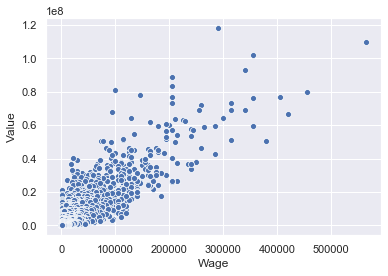

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

graph = sns.scatterplot(x='Wage',y='Value',data=df1)

plt.show()

In [13]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

p = figure(title='FIFA Soccer 2019', x_axis_label='Wage', y_axis_label='Value', plot_width = 700,plot_height = 700, tools=[])
show(p)

In [15]:
from bokeh.plotting import figure,show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage,Value)", "(@Wage, @Value)"),
    ("Name", "@Name")]
)

p = figure(title="Soccer 2019", x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=10, source=df1)
show(p)